In [1]:
from comrad_patch import Application, Page, TextInput, Paragraph, NumberInput, Button, Chart
import matplotlib.pyplot as plt

In [2]:


def children_in_care(entered_care, in_care, left_care):
    #creates chart that will be used for the app
    fig, ax = plt.subplots()

    labels = [
        "Number of children who entered care",
        "Number of children in care",
        "Number of children who left care",
    ]
    counts = [entered_care, in_care, left_care]

    ax.bar(labels, counts)

    ax.set_ylabel("Number of children")
    ax.set_title("Children in, entering and leaving care by year")

    return fig


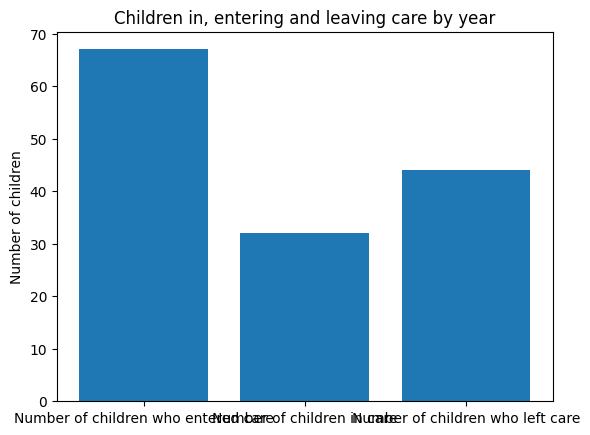

In [3]:
# plot example 
fig = children_in_care(entered_care=67, in_care=32, left_care=44)

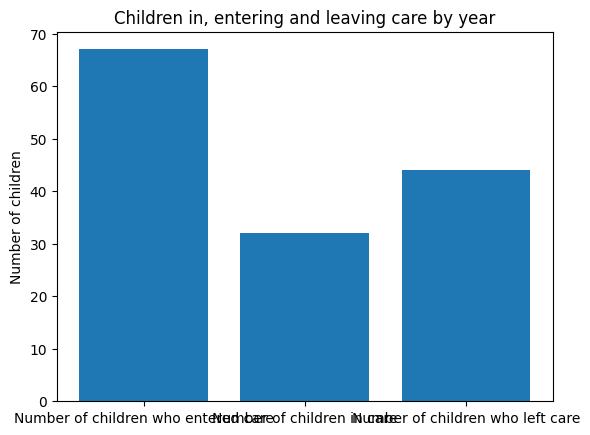

In [4]:
# code <-> converter example
from comrad_patch.util.code import text_to_code, code_to_text
func_in_text = code_to_text(children_in_care)

# the name of the function must be passed for it to work - that's why it will be saved in the Chart component
func_in_code = text_to_code(func_in_text, "children_in_care")

fig = func_in_code(67,32,44)


In [3]:
app = Application()


greeting_page = Page(
    name="index",
    controller={"next": "input_page"},
    components=[TextInput(name="name", required=True)],
)
input_page = Page(
    name="input_page",
    components=[
        Paragraph("Please set the number of children entering, in and who left care"),
        NumberInput("entered_care", "Number of children who entered care"),
        NumberInput("in_care", "Number of children in care"),
        NumberInput("left_care", "Number of children who left care"),
    ],
    controller={"next": "children_in_care"},

)

chart_page = Page(name="children_in_care", components=[Chart(generator=children_in_care)])


app.add_page(greeting_page)
app.add_page(input_page)
app.add_page(chart_page)

print(app.yaml())

from matplotlib import pyplot as plt

def children_in_care(entered_care, in_care, left_care):
    #creates chart that will be used for the app
    fig, ax = plt.subplots()

    labels = [
        "Number of children who entered care",
        "Number of children in care",
        "Number of children who left care",
    ]
    counts = [entered_care, in_care, left_care]

    ax.bar(labels, counts)

    ax.set_ylabel("Number of children")
    ax.set_title("Children in, entering and leaving care by year")

    return fig

pages:
- name: index
  components:
  - required: true
    name: name
    type: TextInput
  controller:
    next: input_page
    previous: null
- name: input_page
  components:
  - text: Please set the number of children entering, in and who left care
    type: Paragraph
  - required: false
    name: entered_care
    description: Number of children who entered care
    type: NumberInput
  - required: false
    name: in_care
    description: Number of children in care
    t